In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Importing the dataset

df = pd.read_csv(r"/content/ACME-HappinessSurvey2020.csv")

In [3]:
# first five rows of the data
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
# X1 = my order was delivered on time
# X2 = contents of my order was as I expected
# X3 = I ordered everything I wanted to order
# X4 = I paid a good price for my order
# X5 = I am satisfied with my courier
# X6 = the app makes ordering easy for me
# As we see the data this a classification problem (0 or 1)


In [5]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [6]:
df = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', "Y"]]

In [7]:
df.shape

(126, 7)

In [8]:
df.duplicated().sum()

16

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      126 non-null    int64
 1   X2      126 non-null    int64
 2   X3      126 non-null    int64
 3   X4      126 non-null    int64
 4   X5      126 non-null    int64
 5   X6      126 non-null    int64
 6   Y       126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [10]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [11]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968,0.547619
std,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311,0.499714
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


**Exploratory Data Analysis (EDA)**

In [12]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [13]:
df['X1'].value_counts()

# X1 = my order was delivered on time
# only one customer has given 1 mark a part of 1 customer all are happy with the delivery time experience.

X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64

<Axes: xlabel='X1', ylabel='count'>

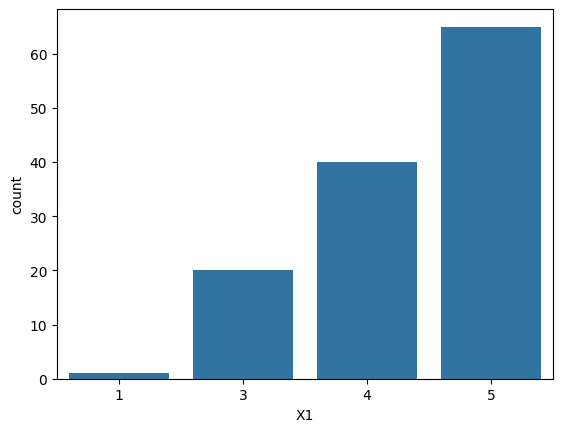

In [14]:
# X1 = my order was delivered on time
# As we can see in the plot most of the customers are happy that there orders was delivered on time.
# most of the customers has given 3 or more number in this case.

sns.countplot(x ="X1", data = df)

In [15]:
df["X2"].value_counts()

# X2 = contents of my order was as I expected
# As we can see 33.3% of customers have given 3 number for the contents of there order was as they expected.
# 26.9% of the customer has given 2 number.
# 21% of the customer has given 1 number.
# 13.4% of the customer has given 4 number.
# only 4.7% of the custer has given 5 number.

X2
3    42
2    34
1    27
4    17
5     6
Name: count, dtype: int64

<Axes: xlabel='X2', ylabel='count'>

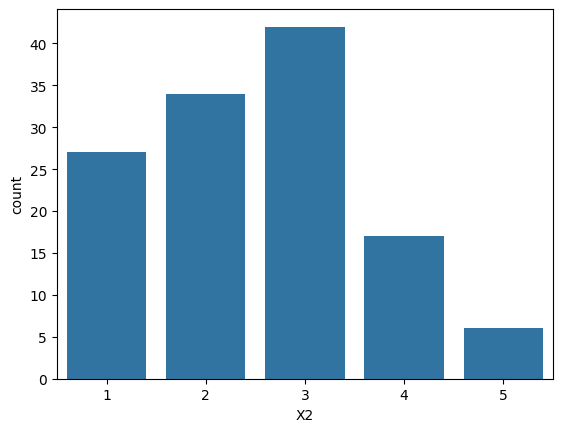

In [16]:
sns.countplot(x= "X2", data = df)

In [17]:
df.shape

(126, 7)

In [18]:
df["X3"].value_counts()
# X3 = I ordered everything I wanted to orders.
# 16% of the members are giving 2 or less numbers.
# 83% of the members are fairly happy as they have given 3 marks or more.
# company is doing well in this case.

X3
3    55
4    33
5    17
2    14
1     7
Name: count, dtype: int64

<Axes: xlabel='X3', ylabel='count'>

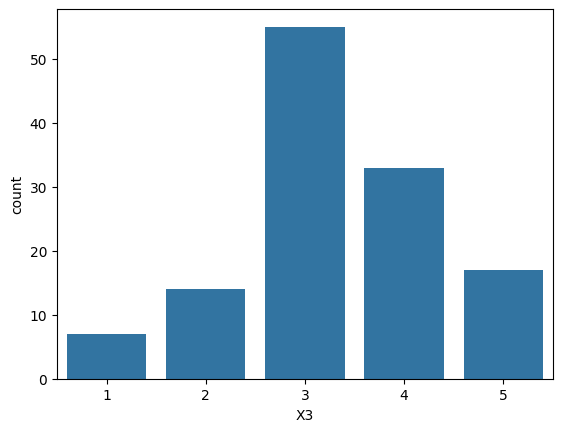

In [19]:
sns.countplot(x = "X3", data = df)
# As we can see in the plot most of the customers are happy they ordered everything they wanted to order.

In [20]:
df["X4"].value_counts()

# X4 = I paid a good price for my order
# 95% of the customers has given 3 or more number.
# they are happy with the prices of the product.

X4
4    53
3    41
5    25
2     5
1     2
Name: count, dtype: int64

<Axes: xlabel='X4', ylabel='count'>

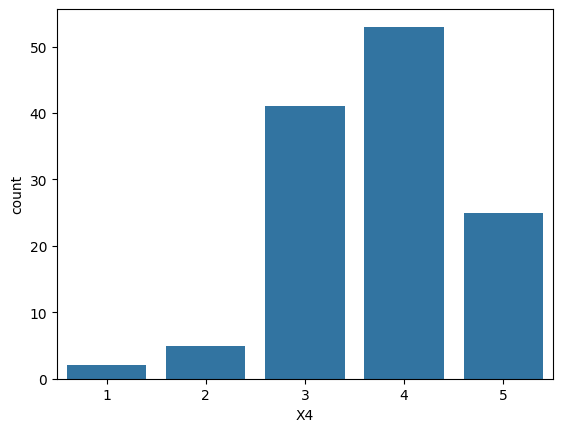

In [21]:
sns.countplot(x = "X4", data = df)
# As we can in the plot as well, customers are happy with the prices of the products.

In [22]:
df["X5"].value_counts()

# X5 = I am satisfied with my courier
# 18% of the customers are not happy with the company's courier service .
# 81% of the members are happy with the company's courier service.

X5
4    50
5    31
3    22
2    16
1     7
Name: count, dtype: int64

<Axes: xlabel='X5', ylabel='count'>

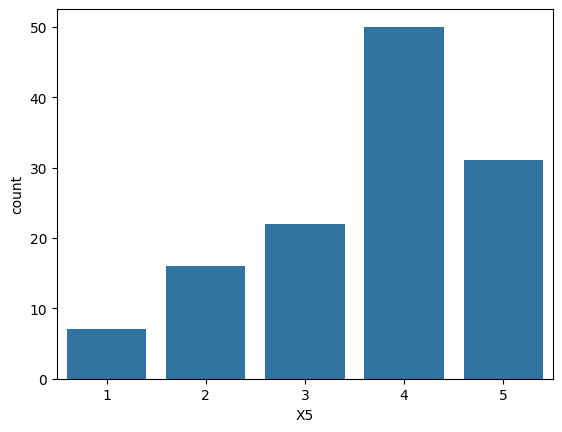

In [23]:
sns.countplot(x = "X5", data = df)
# as we can see in the plot most of them has given 4 number
# most of them satisfied with their courier.

In [24]:
df["X6"].value_counts()

# X6 = the app makes ordering easy for me
# 98% of the customers are happy that the app makes ordering easy for them.

X6
5    57
4    47
3    20
2     1
1     1
Name: count, dtype: int64

<Axes: xlabel='X6', ylabel='count'>

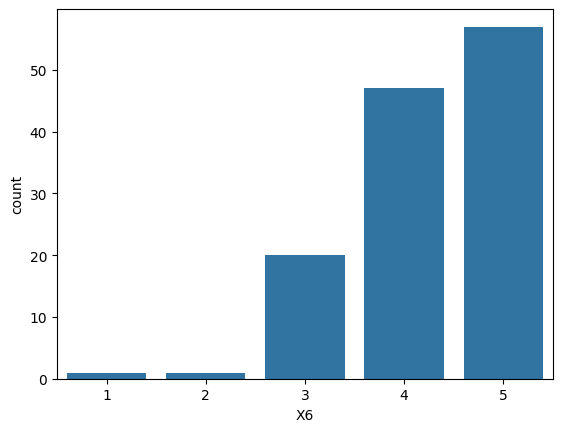

In [25]:
sns.countplot(x = "X6", data = df)

# As we can in the plot as well most of the customers are happy that the app makes ordering easy for them.

**Final Report**


👉 Customers are really happy with the app as they are able to order everything well.

👉 they are happy with product price.

👉 they are NOT happy with contents of there  order as they were expecting.

👉 They Need to check  the product and the quality of the product & also how those product are getting packed.



 **Now geatting into machine learning and predictions**

In [26]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [27]:
# Separating the data in feature and target

X = df.drop(["Y"], axis=1)
Y = df["Y"]

In [28]:
# Splitting the data for the training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =2)

In [29]:
!pip install  lazypredict
# model selection


In [30]:
# We are using LazyClassifier to know which model is good for the data.

from lazypredict.Supervised import LazyClassifier
cl1 = LazyClassifier()

In [31]:
cl1.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:01<00:00, 15.13it/s]

[LightGBM] [Info] Number of positive: 53, number of negative: 47
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530000 -> initscore=0.120144
[LightGBM] [Info] Start training from score 0.120144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 SGDClassifier                      0.65               0.68     0.68      0.66   
 BernoulliNB                        0.65               0.66     0.66      0.66   
 NearestCentroid                    0.65               0.66     0.66      0.66   
 LogisticRegression                 0.65               0.64     0.64      0.66   
 RandomForestClassifier             0.62               0.63     0.63      0.62   
 ExtraTreesClassifier               0.58               0.60     0.60      0.58   
 LinearSVC                          0.62               0.59     0.59      0.62   
 LinearDiscriminantAnalysis         0.62               0.59     0.59      0.62   
 RidgeClassifierCV                  0.62               0.59     0.59      0.62   
 RidgeClassifier                    0.62               0.59     0.59      0.62   
 BaggingClassifi

In [32]:
# Now we are using XGBClassifier because it is shown the have highest accuracy for the given data in lazypredict.

from xgboost import XGBClassifier

In [33]:
cl2 = XGBClassifier(random_state= 2)

In [34]:
cl2.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [35]:
Y_train_predicted = cl2.predict(X_train)

In [36]:
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.96      0.91      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [37]:
Y_test_predicted = cl2.predict(X_test)

In [38]:
print(classification_report(Y_test, Y_test_predicted))

# this is a overfitted model.

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.62      0.50      0.55        16

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.53      0.50      0.51        26



In [86]:
# doing some parameters tuning for better accuracy result

cl3 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [40]:
cl3.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
Y_train_predicted = cl3.predict(X_train)

In [42]:
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        47
           1       0.80      0.60      0.69        53

    accuracy                           0.71       100
   macro avg       0.73      0.72      0.71       100
weighted avg       0.73      0.71      0.71       100



In [43]:
Y_test_predicted = cl3.predict(X_test)

In [44]:
print(classification_report(Y_test, Y_test_predicted))

# accuracy looks ok but recall for 0 is 80%.
# for the given problem this is a good model as we are focusing more on unhappy customers.


              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.82      0.56      0.67        16

    accuracy                           0.65        26
   macro avg       0.68      0.68      0.65        26
weighted avg       0.71      0.65      0.66        26



**Recursive Feature Elimination**

Using Feature elimination technique to filter the features for the better performance of the model.


In [45]:
# Using Feature elimination technique to filter the features for the better performance of the model.
# We will look for the 4 features out of 6.
# this will also help company not to ask so many questions in the next Servey.

from sklearn.feature_selection import RFE

selector = RFE(estimator = cl3, n_features_to_select = 4, step =1)
selector.fit(X, Y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=1, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=2, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=2, n_jobs=None, num_parallel_tree=None,
                            random_state=None, ...),
    n_features_to_select=4)

In [46]:
selector.support_

array([ True, False, False,  True,  True,  True])

In [47]:
selector.ranking_

array([1, 3, 2, 1, 1, 1])

In [48]:
# After usning RFE we find more important features out of 6 feature

new_features = pd.DataFrame(list(zip(X, selector.support_)))
print(new_features)

    0      1
0  X1   True
1  X2  False
2  X3  False
3  X4   True
4  X5   True
5  X6   True


In [49]:
x = df[["X1", "X4", "X5", "X6"]]
y = df["Y"]

In [50]:
# splitting the data for the training and testing after RFE (only with four features)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [51]:
cl3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
y_train_predicted = cl3.predict(x_train)

In [53]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        47
           1       0.74      0.60      0.67        53

    accuracy                           0.68       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



In [54]:
y_test_predicted = cl3.predict(x_test)

In [55]:
print(classification_report(y_test, y_test_predicted))

# Model looks good for the given problems as we are focusing more on the unhappy customers.

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.83      0.62      0.71        16

    accuracy                           0.69        26
   macro avg       0.70      0.71      0.69        26
weighted avg       0.73      0.69      0.70        26



**Ensembling for the better accuracy**

In [56]:
# importing StackingClassifier

from mlxtend.classifier import StackingClassifier

In [57]:
# defining base learner

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

cl4 = BernoulliNB()
cl5 = NearestCentroid()
cl6 = LogisticRegression()

In [58]:
# defining meta model

cl3 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.01, objective='binary:logistic')

In [59]:
# Creating stacking classifier with the above models improve accuracy

sc = StackingClassifier(classifiers =[cl4, cl5, cl6], meta_classifier= cl3)

In [60]:
sc.fit(X_train, Y_train)

StackingClassifier(classifiers=[BernoulliNB(), NearestCentroid(),
                                LogisticRegression()],
                   meta_classifier=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=2, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [61]:
Y_train_predicted = sc.predict(X_train)

In [62]:
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.53      1.00      0.69        53

    accuracy                           0.53       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.28      0.53      0.37       100



In [63]:
Y_test_predicted = sc.predict(X_test)

In [64]:
print(classification_report(Y_test, Y_test_predicted))

# In this case StackingClassifier is not working well as it is not able to learn the unhappy customers.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26



**Using VotingClassifier to see what if we can improve the accuracy**

In [76]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = BernoulliNB()
clf2 = NearestCentroid()
clf3 = LogisticRegression()
clf4 = SVC(probability =True)

In [77]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('Bernoulli', clf1), ("NearestCentroid", clf2), ("Logistic", clf3), ("SVC", clf4)], voting="hard")
eclf1.fit(X_train, Y_train)

Y_train_predicted = eclf1.predict(X_train)
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        47
           1       0.66      0.70      0.68        53

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



In [78]:
Y_test_predicted = eclf1.predict(X_test)

print(classification_report(Y_test, Y_test_predicted))

# this is not the right model for the given problem.

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.64      0.56      0.60        16

    accuracy                           0.54        26
   macro avg       0.53      0.53      0.53        26
weighted avg       0.56      0.54      0.54        26



In [79]:
eclf2 = VotingClassifier(estimators=[('Bernoulli', clf1), ("Logistic", clf3), ("SVC", clf4)], voting="soft")

In [82]:
eclf2.fit(X_train, Y_train)
Y_train_predcited = eclf2.predict(X_train)
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        47
           1       0.66      0.70      0.68        53

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



In [85]:
Y_test_predicted = eclf2.predict(X_test)
print(classification_report(Y_test, Y_test_predicted))

# the Soft voting classifier model is good but we need more accuracy for the given problem.

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.67      0.62      0.65        16

    accuracy                           0.58        26
   macro avg       0.56      0.56      0.56        26
weighted avg       0.59      0.58      0.58        26



**Final Report on the given data**

👉 Customers are really happy with the app as they are able to order everything well.

👉 they are happy with product price.

👉 they are NOT happy with contents of there order as they were expecting.

👉 They Need to check the product and the quality of the product & also how those product are getting packed.


**Reports on further predictions**  

with model cl3

👉 **80% accuracy seems usefull for (unhappy customer)** the given problem & 56% accuracy for the happy customers.



👉 **With the same model(cl3)**, after removing some of the feedback columns (which were not very usefull) the accuracy seems to be more usefull as it is giving better result for both Unhappy and happy customers **(80% for unhappy and 62% happy customers ).**

It also mean if we use the this model in the **next Survay** we have to give less options to the customers. This would be **more convenient for the customers**.

We can use this model in the productions.




